In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential 
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [2]:
data= pd.read_csv("F:/Practice/heart_failure.csv")

In [3]:
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


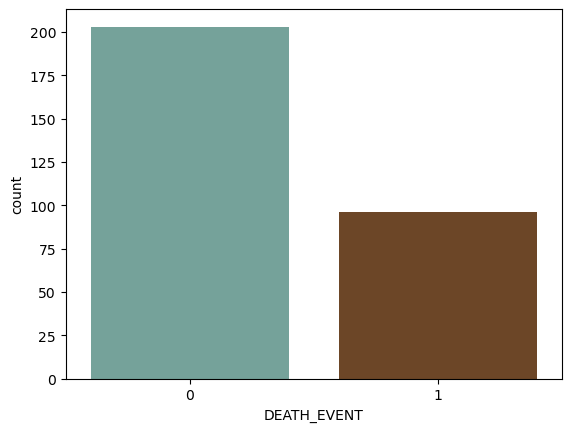

In [5]:
cols = ["#6daa9f", "#77451c"]  
sns.countplot(x=data["DEATH_EVENT"], palette=cols)
plt.show()


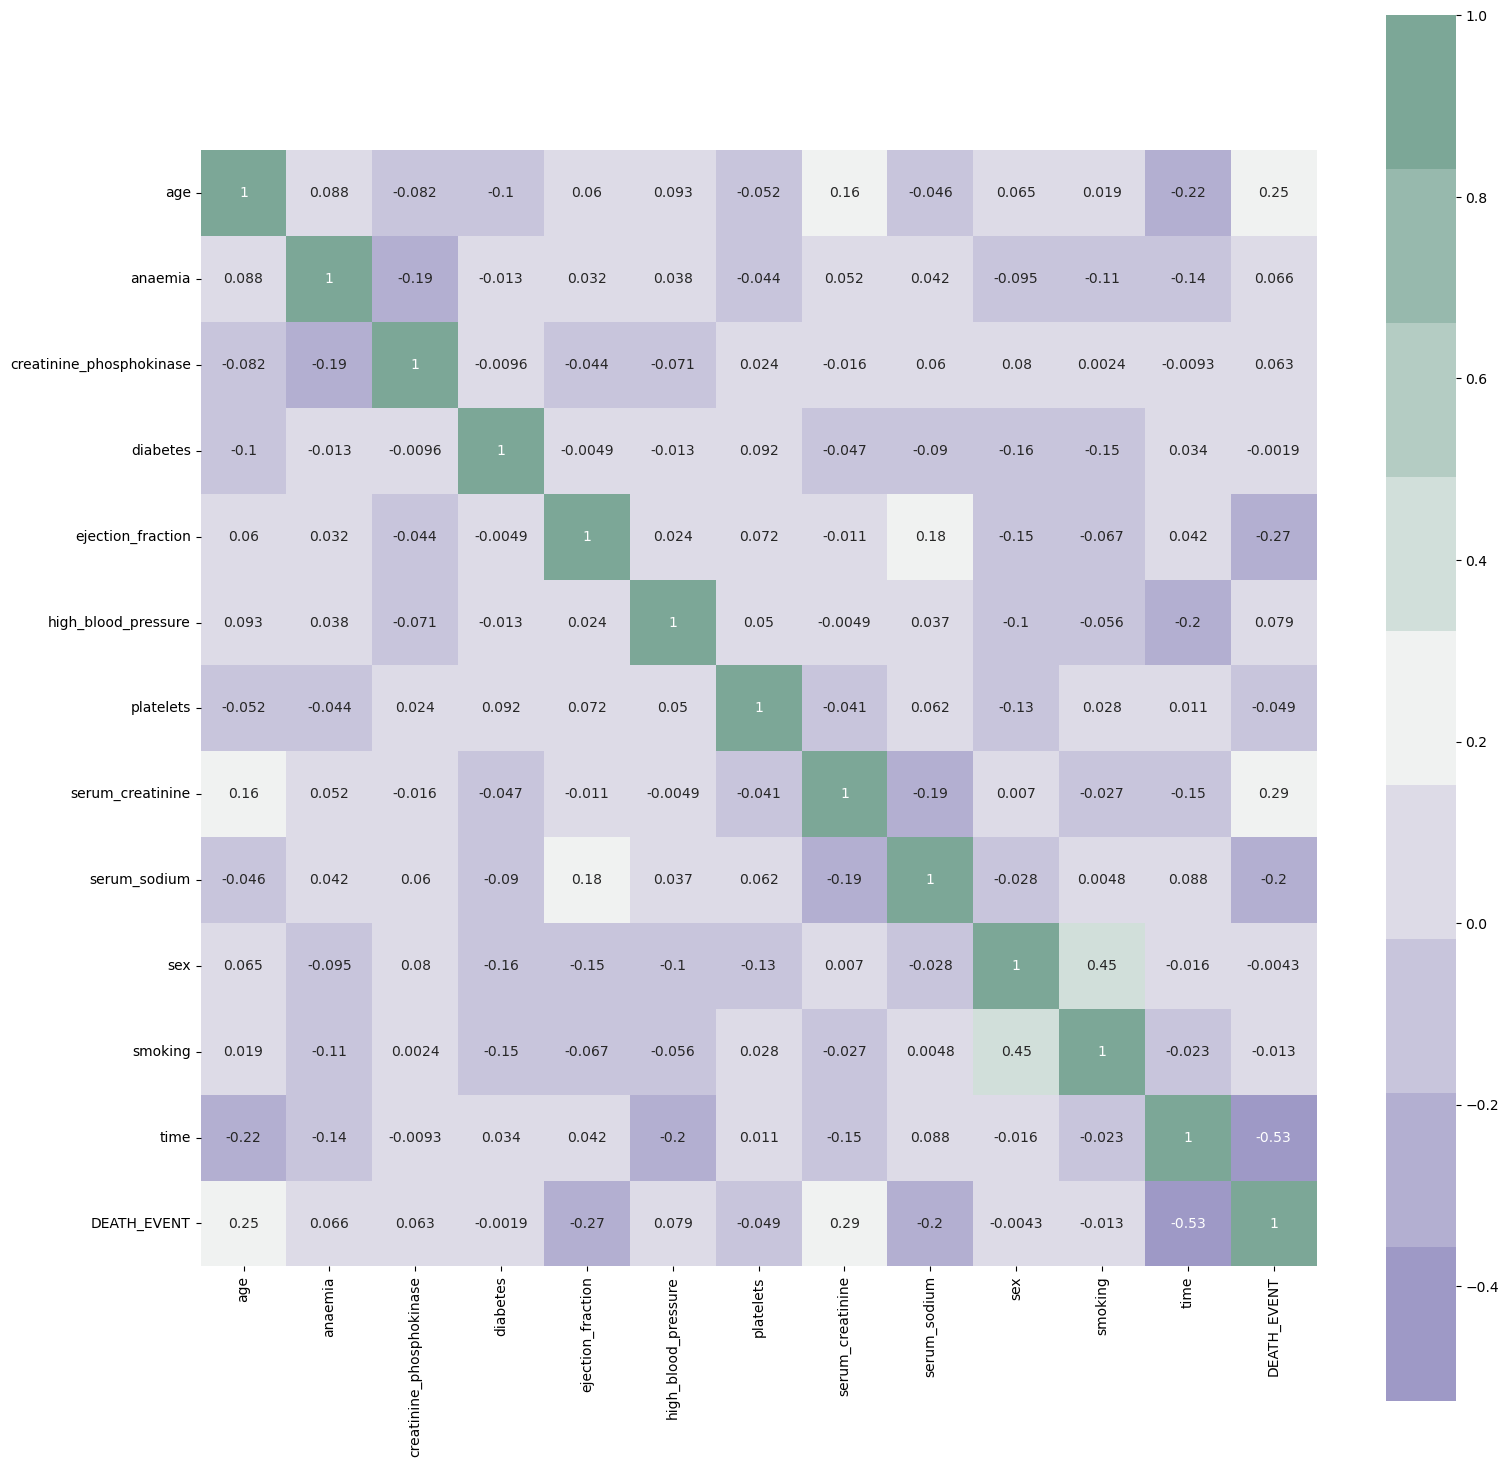

In [6]:
cmap = sns.diverging_palette(270, 160, s=40, l=65, n=9)
corrmat = data.corr()
plt.figure(figsize=(18, 18)) 
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)
plt.show()


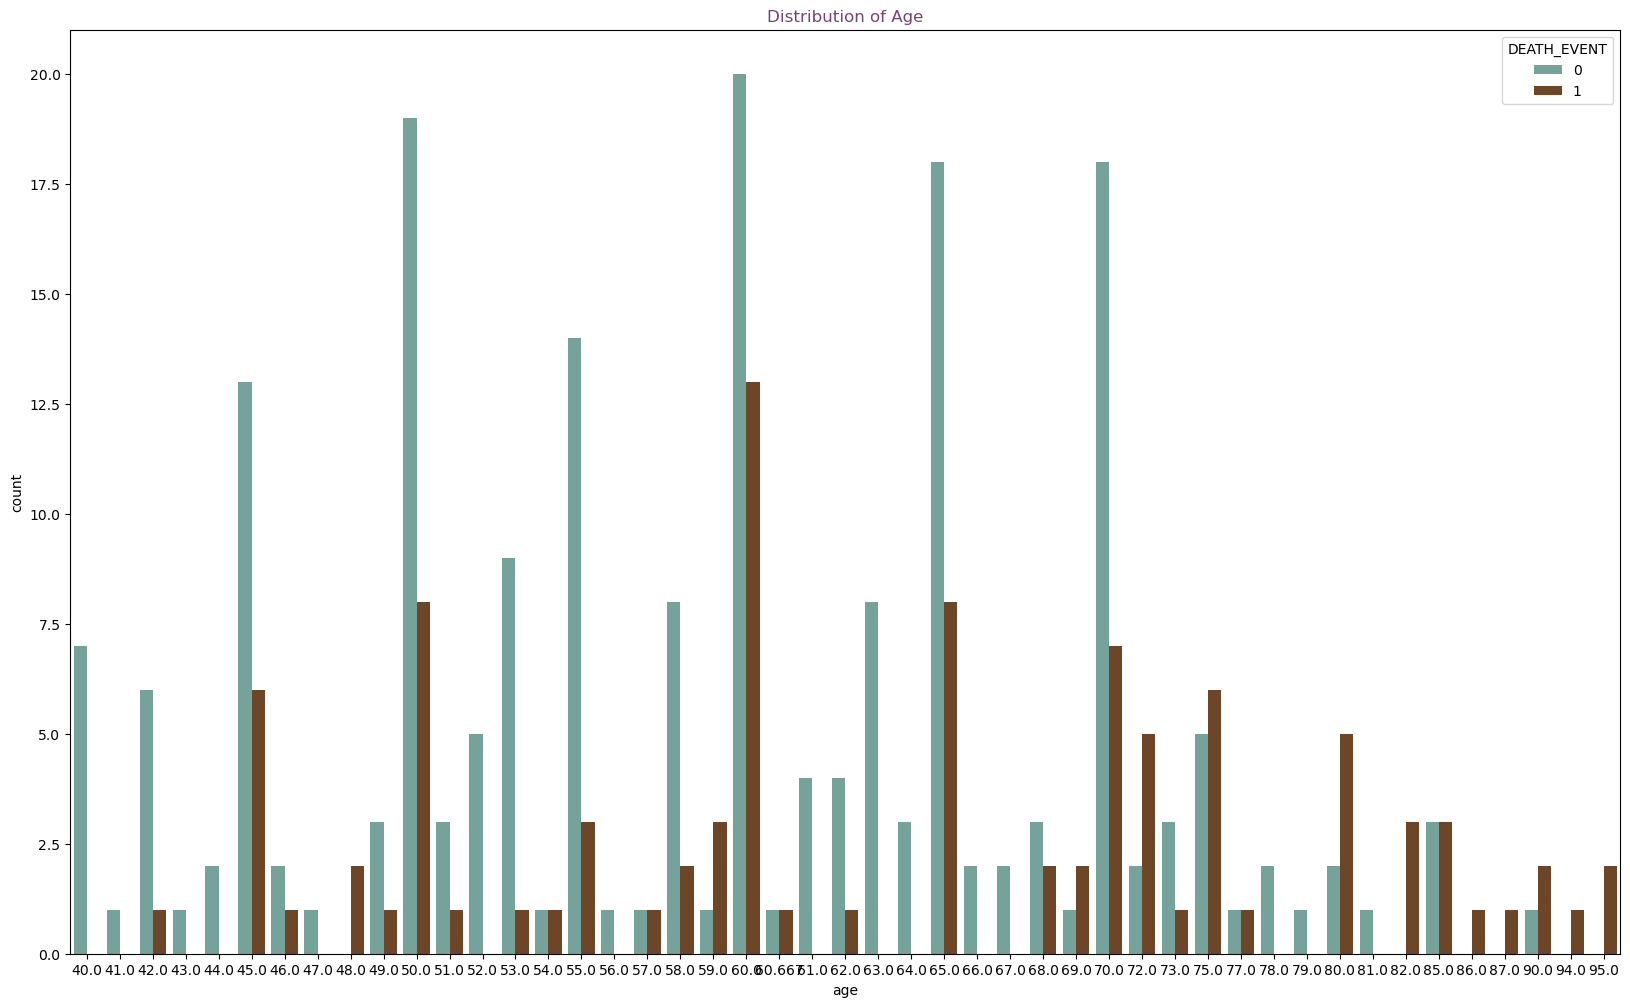

In [7]:
cols = ["#6daa9f", "#77451c"]
plt.figure(figsize=(20, 12))
Days_of_week = sns.countplot(x='age', data=data, hue="DEATH_EVENT", palette=cols)
Days_of_week.set_title("Distribution of Age", color="#774573")  
plt.show()


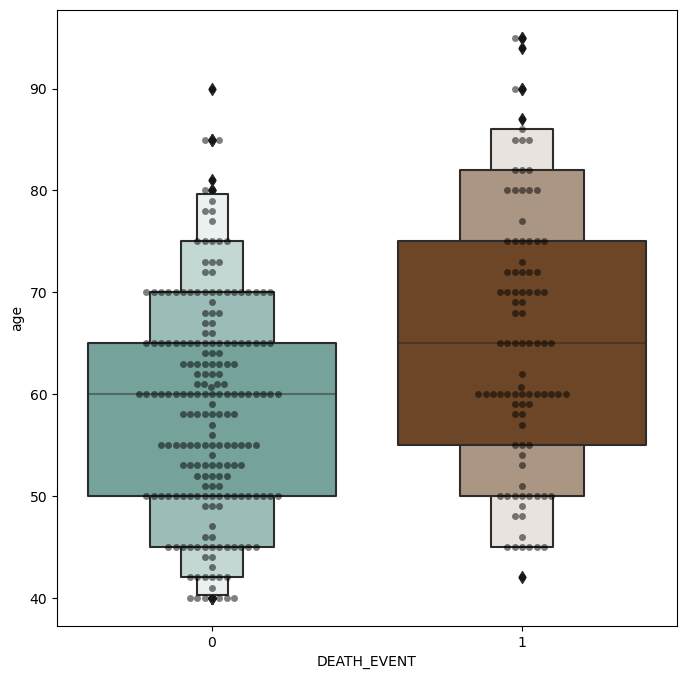

C:\Users\ADITYA\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


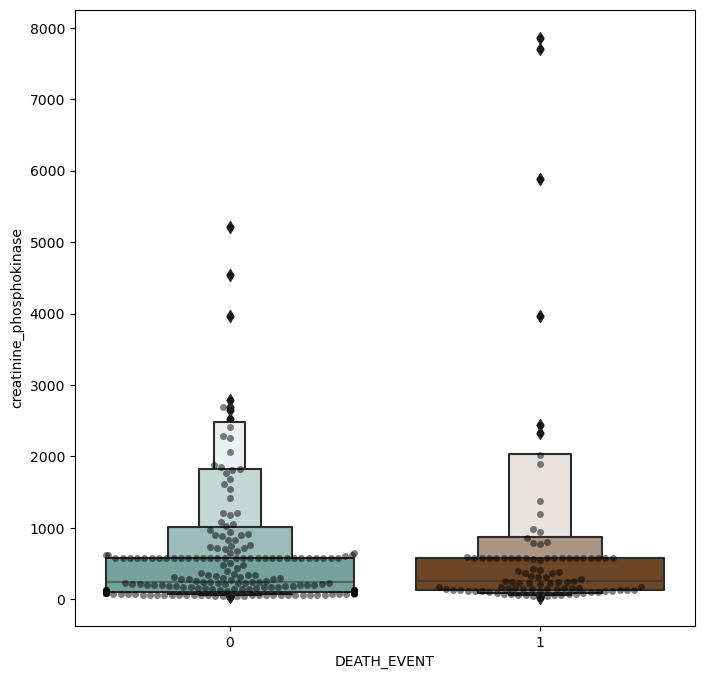

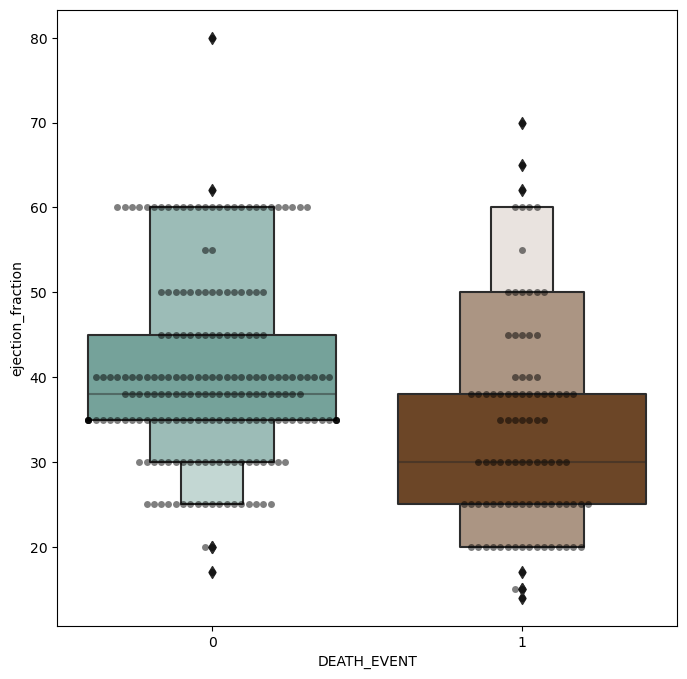

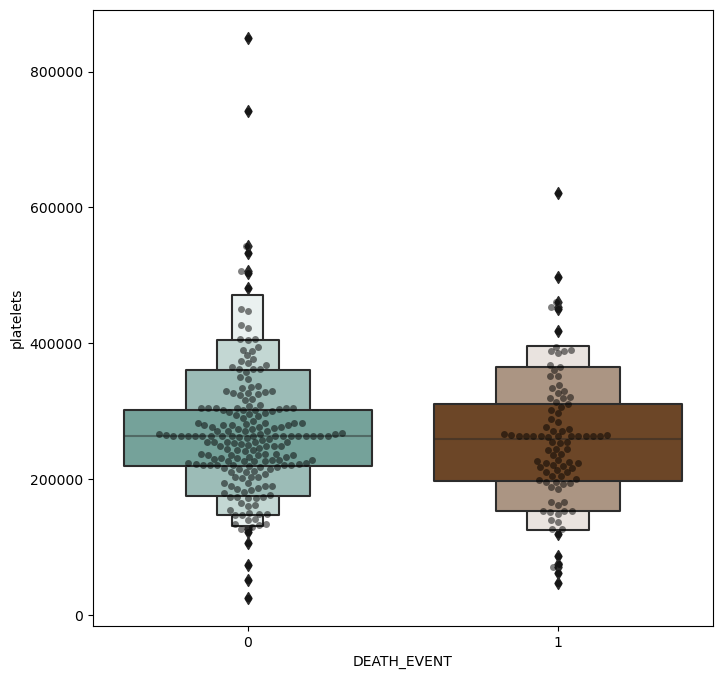

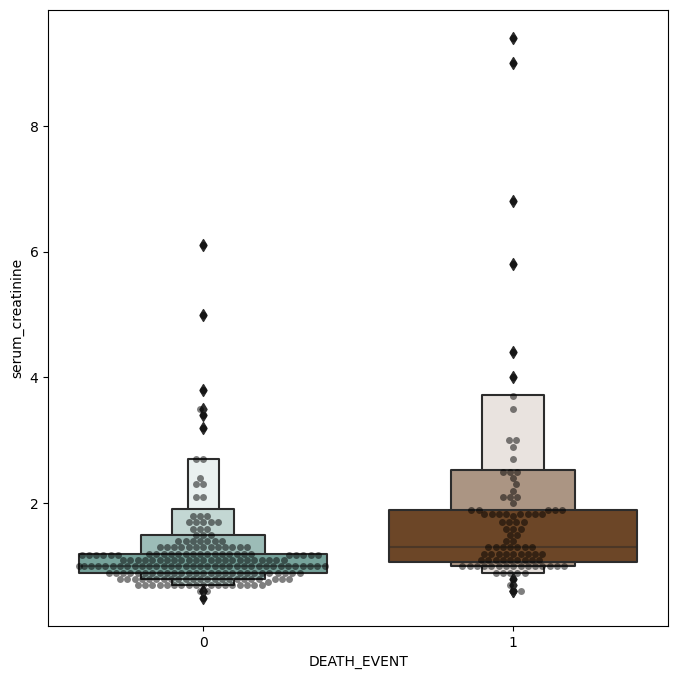

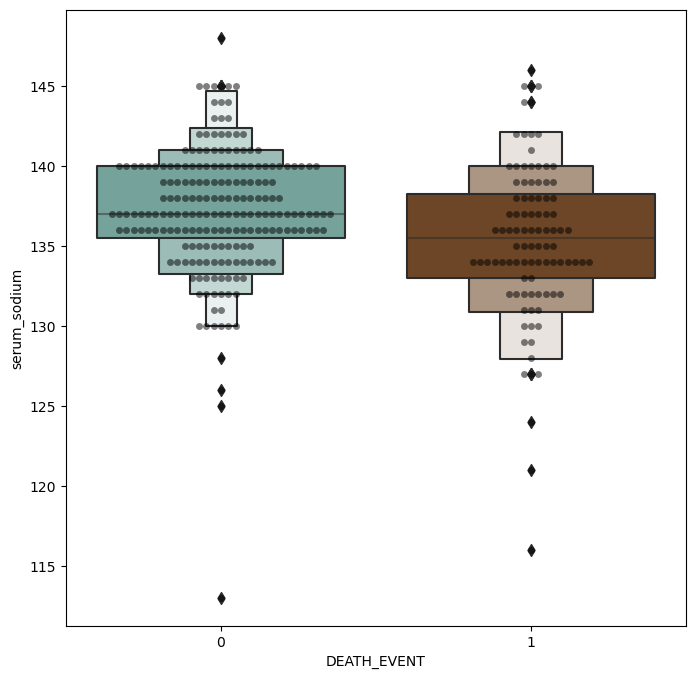

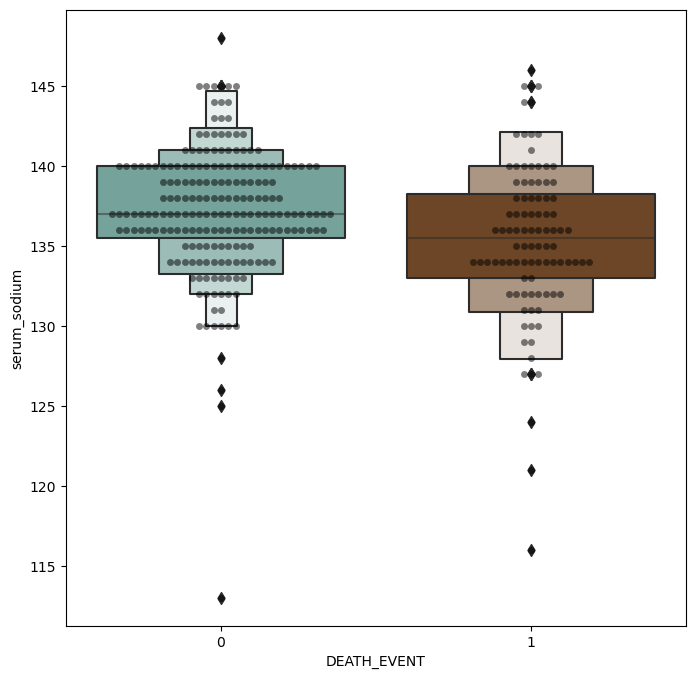

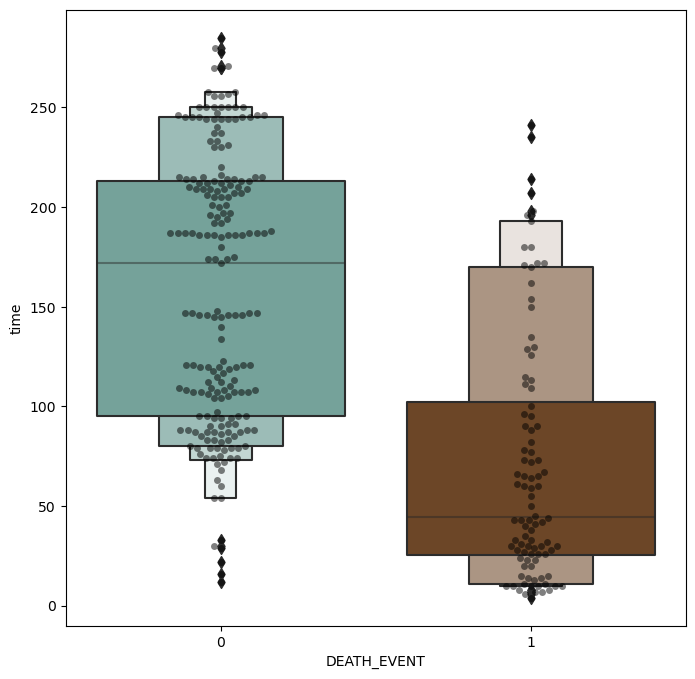

In [8]:
feature = ["age","creatinine_phosphokinase", "ejection_fraction","platelets","serum_creatinine","serum_sodium","serum_sodium","time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=data["DEATH_EVENT"],y=data[i], color="black", alpha=0.5)
    sns.boxenplot(x=data["DEATH_EVENT"],y= data[i], palette=cols)
    plt.show()

# There is some outliers which is deciding important factor in medical

<Axes: xlabel='time', ylabel='age'>

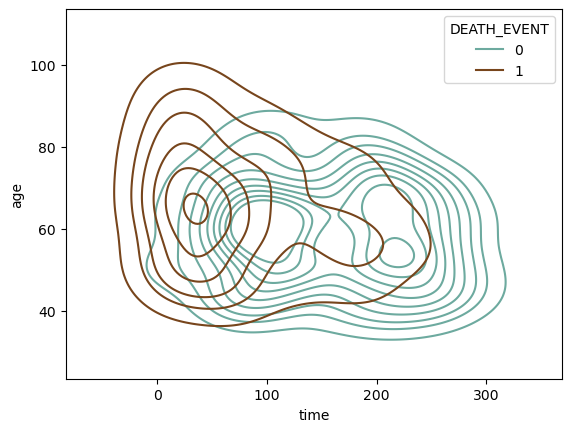

In [10]:
sns.kdeplot(x=data["time"], y= data["age"],hue=data["DEATH_EVENT"],palette=cols)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# Data Preprocessing 

In [16]:
X=data.drop(["DEATH_EVENT"], axis =1)
y=data["DEATH_EVENT"]

# Standard Scaler for feature 

In [17]:
col_names = list(X.columns)
s_scaler =preprocessing.StandardScaler()
X_df=s_scaler.fit_transform(X)
X_df=pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


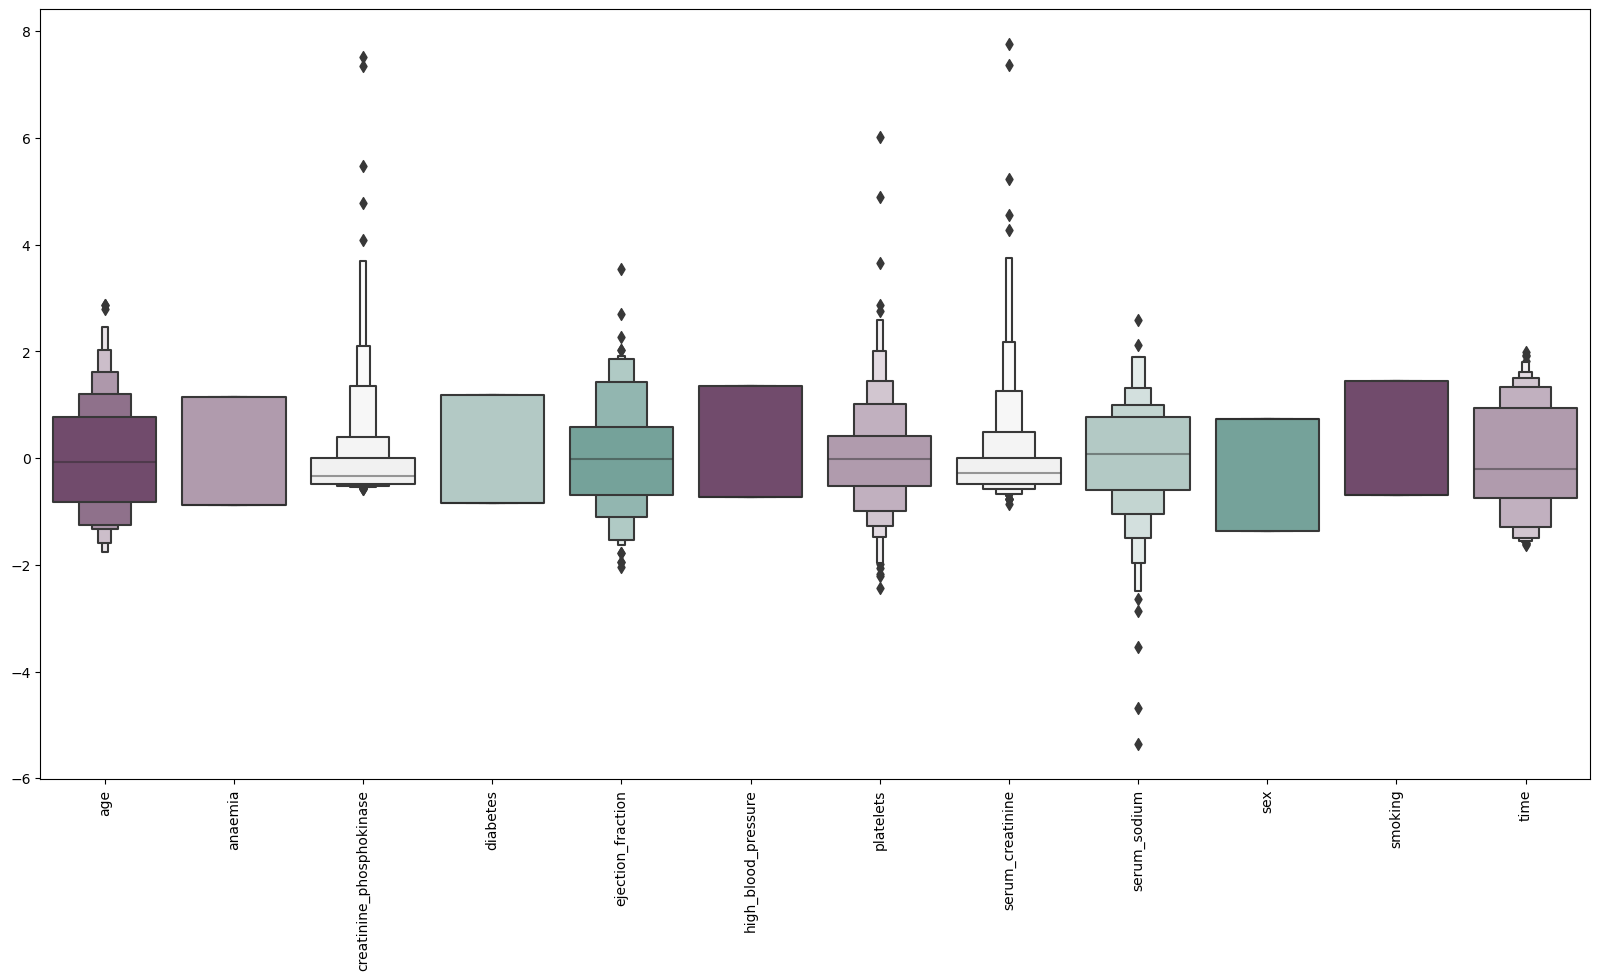

In [18]:
colors=["#774571", "#b398af", "#f1f1f1", "#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data=X_df,palette= colors)
plt.xticks(rotation=90)
plt.show()

# splitting test and training sets

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X_df, y, test_size=0.25, random_state=7)

# Model Building 

In [23]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

# The model
model = Sequential()
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model& train model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=500, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/500
6/6 [==============================] - 1s 33ms/step - loss: 0.6929 - accuracy: 0.5810 - val_loss: 0.6923 - val_accuracy: 0.6667
Epoch 2/500
6/6 [==============================] - 0s 7ms/step - loss: 0.6922 - accuracy: 0.6480 - val_loss: 0.6914 - val_accuracy: 0.6667
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6913 - accuracy: 0.6480 - val_loss: 0.6906 - val_accuracy: 0.6667
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.6480 - val_loss: 0.6898 - val_accuracy: 0.6667
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 0.6898 - accuracy: 0.6480 - val_loss: 0.6889 - val_accuracy: 0.6667
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.6480 - val_loss: 0.6880 - val_accuracy: 0.6667
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6880 - accuracy: 0.6480 - val_loss: 0.6870 - val_accuracy: 0.6667
Epoch 8/500
6/6 [=========

6/6 [==============================] - 0s 6ms/step - loss: 0.5366 - accuracy: 0.7430 - val_loss: 0.5227 - val_accuracy: 0.7556
Epoch 60/500
6/6 [==============================] - 0s 5ms/step - loss: 0.5371 - accuracy: 0.7374 - val_loss: 0.5197 - val_accuracy: 0.7556
Epoch 61/500
6/6 [==============================] - 0s 5ms/step - loss: 0.5128 - accuracy: 0.7765 - val_loss: 0.5172 - val_accuracy: 0.7778
Epoch 62/500
6/6 [==============================] - 0s 8ms/step - loss: 0.4806 - accuracy: 0.7374 - val_loss: 0.5152 - val_accuracy: 0.8000
Epoch 63/500
6/6 [==============================] - 0s 8ms/step - loss: 0.4895 - accuracy: 0.7709 - val_loss: 0.5133 - val_accuracy: 0.8222
Epoch 64/500
6/6 [==============================] - 0s 7ms/step - loss: 0.4797 - accuracy: 0.7654 - val_loss: 0.5123 - val_accuracy: 0.8222
Epoch 65/500
6/6 [==============================] - 0s 8ms/step - loss: 0.4597 - accuracy: 0.7877 - val_loss: 0.5110 - val_accuracy: 0.8222
Epoch 66/500
6/6 [===============

In [25]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\nval_accuracy: %.2f" % (val_accuracy * 100))



val_accuracy: 73.68


# Ploting training and validation loss over epoch

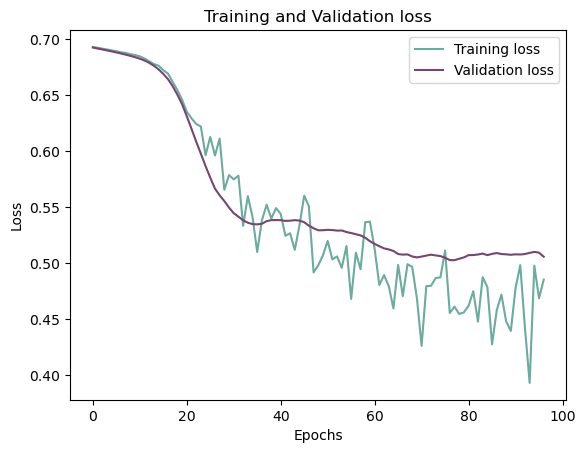

In [28]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, 'loss'], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, 'val_loss'], "#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best") 
plt.show()

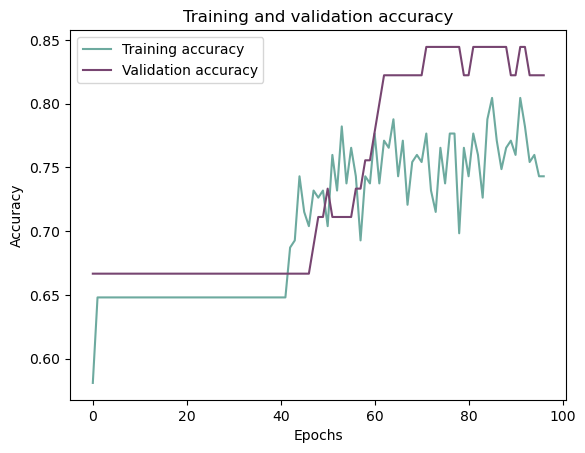

In [30]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], "#6daa9f", label='Training accuracy')
plt.plot(history_df['val_accuracy'], "#774571", label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Predicting the test result

In [31]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 [==============================] - 0s 4ms/step


# confusion Marix

In [32]:
cmap1 = sns.diverging_palette(275,150, s=40, l=65, n=6)
plt.subplots(figsize=12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot+kws = {'size :15'})

SyntaxError: unmatched ')' (1811173578.py, line 2)

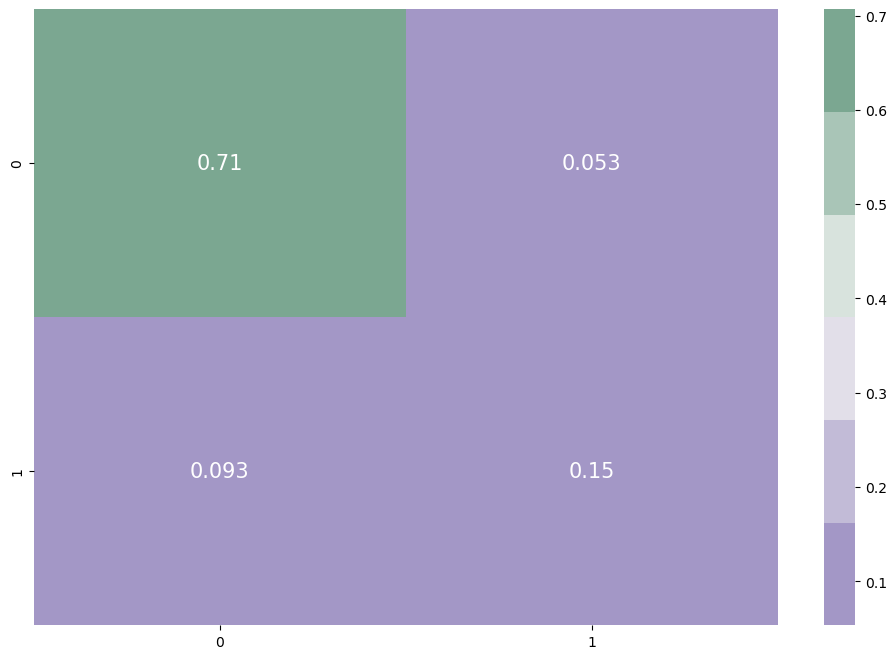

In [35]:
cmap1 = sns.diverging_palette(275, 150, s=40, l=65, n=6)
plt.subplots(figsize=(12, 8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix / np.sum(cf_matrix), cmap=cmap1, annot=True, annot_kws={'size': 15})
plt.show()


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        57
           1       0.73      0.61      0.67        18

    accuracy                           0.85        75
   macro avg       0.81      0.77      0.79        75
weighted avg       0.85      0.85      0.85        75

